## **Data Graph Explorer**

Welcome to the Data Graph Explorer!
How would you like to load your CSV file?
1. Upload from your computer
2. Provide a URL
3. Use a predefined dataset
Enter your choice (1/2/3): 3

Columns in the dataset:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Here are the first two rows of the data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  

Available columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Choose the first colu

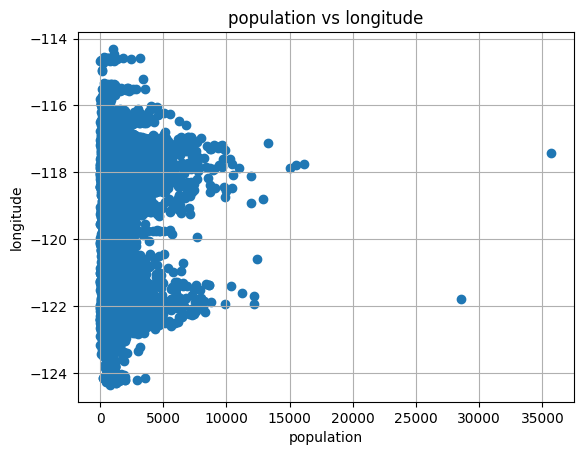


Would you like to create another graph? (yes/no): no
Thanks for exploring your data. Goodbye!


In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def get_csv_file():
    print("How would you like to load your CSV file?")
    print("1. Upload from your computer")
    print("2. Provide a URL")
    print("3. Use a predefined dataset")

    choice = input("Enter your choice (1/2/3): ")

    if choice == "1":
        uploaded = files.upload()
        file_name = list(uploaded.keys())[0]
    elif choice == "2":
        url = input("Enter the URL to the CSV file: ")
        file_name = "temp.csv"
        df = pd.read_csv(url)
        df.to_csv(file_name, index=False)
    elif choice == "3":
        file_name = "/content/sample_data/california_housing_train.csv"
        df = pd.read_csv(file_name)
        df.to_csv(file_name, index=False)
    else:
        print("Invalid choice. Please try again.")
        return None

    return pd.read_csv(file_name)

def explore_data(df):
    print("\nColumns in the dataset:")
    print(df.columns.tolist())
    print("\nHere are the first two rows of the data:")
    print(df.head(2))
    return df.columns.tolist()

def plot_data(df, columns):
    print("\nAvailable columns:", columns)
    col1 = input("Choose the first column: ")
    col2 = input("Choose the second column (optional): ")

    if col1 not in columns or (col2 and col2 not in columns):
        print("Invalid selection. Please try again.")
        return

    data_x = df[col1].to_numpy()
    if col2:
        data_y = df[col2].to_numpy()
        plt.scatter(data_x, data_y)
        plt.title(f"{col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
    else:
        plt.plot(data_x)
        plt.title(f"Line Graph of {col1}")
        plt.xlabel("Index")
        plt.ylabel(col1)

    plt.grid()
    plt.show()

def main():
    print("Welcome to the Data Graph Explorer!")
    df = get_csv_file()

    if df is None:
        return

    columns = explore_data(df)

    while True:
        plot_data(df, columns)
        again = input("\nWould you like to create another graph? (yes/no): ").strip().lower()
        if again != "yes":
            print("Thanks for exploring your data. Goodbye!")
            break

main()
